In [130]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import statistics as stat

# couldn't get these kagglehub packages working so I'm manually downloading the data
# import kagglehub # this gets the data online here: https://www.kaggle.com/datasets/adilshamim8/sleep-cycle-and-productivity/data
# from kagglehub import KaggleDatasetAdapter

# Introduction
This analysis will explore the many variables of sleep.
Here is the link to the [kagglehub dataset ](https://www.kaggle.com/datasets/adilshamim8/sleep-cycle-and-productivity/data).

## New Note:
We will be doing a Binomial Logistical Regression.  

For graphing labeling purposes, the dependent variable will be 'Sleep Quality.' This has a set of values of 1 to 10, with 1 being the worse (nightmares) and 10 being the best (sweet dreams).
This label will be reduced from 10 values down to 2: Poor Sleep (0) and Proper Sleep (1) in a new column called 'Proper Sleep Threshold'. If you have a self-reported sleep score of 7 or higher you get a label of Proper Sleep (1), if you score lower than 7 then you get a label of Poor sleep (0). This is done to create a binomal classification.

Along with will be 'Total Sleep Hours', 'Sleep Quality',
'Exercise (mins/day)', 'Caffeine Intake (mg)',
'Screen Time Before Bed (mins)', and 'Work Hours (hrs/day)'.

Some variables such as 'Exercise (mins/day)' and 'Screen Time Before Bed (mins)' will be converted to hours to keep all the time variables consistent.

There will be a train and test split of 80-20 respectively.

The goal is to create a machine learning model that can predict sleep quality.

# 1) Loads the data

In [131]:
# this is google collab stuff I need to add to access the files on my gdrive -JU
import os
from google.colab import drive
drive.mount('/content/drive/')
os.chdir("/content/drive/My Drive/NIH_FAES/SPRING_2025/BIO_509_Machine_Learning_Class/Final_Project")


df = pd.read_csv("sleep_cycle_productivity.csv")
display(df)

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


,Date,Person_ID,Age,Gender,Sleep Start Time,Sleep End Time,Total Sleep Hours,Sleep Quality,Exercise (mins/day),Caffeine Intake (mg),Screen Time Before Bed (mins),Work Hours (hrs/day),Productivity Score,Mood Score,Stress Level
0,2024-04-12,1860,32,Other,23.33,4.61,5.28,3,86,87,116,8.808920,8,3,6
1,2024-11-04,1769,41,Female,21.02,2.43,5.41,5,32,21,88,6.329833,10,3,7
2,2024-08-31,2528,20,Male,22.10,3.45,5.35,7,17,88,59,8.506306,10,9,10
3,2024-02-22,8041,37,Other,23.10,6.65,7.55,8,46,34,80,6.070240,8,4,2
4,2024-02-23,4843,46,Other,21.42,4.17,6.75,10,61,269,94,11.374994,8,7,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,2024-01-03,5192,38,Female,22.78,4.15,5.37,1,55,216,96,9.384504,5,2,1
4996,2024-06-02,7134,55,Male,21.48,5.39,7.91,4,70,81,177,5.016193,5,6,2
4997,2024-08-13,6265,44,Female,22.02,2.82,4.80,6,21,90,139,11.788651,2,7,1
4998,2024-12-26,4205,55,Other,23.47,7.87,8.40,9,15,87,161,7.093145,8,1,6


# 2) Data cleaning and dataframe manipulation set up

In [132]:
## see all values for df
exclude_list = ['Date', 'Person_ID', 'Sleep Start Time', 'Sleep End Time']
for column in df.columns:
    if column in exclude_list:
        pass
    else:
      ur = df[column].unique()
      ur = sorted(ur)
      print(f'{column}: {ur}')

Age: [18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59]
Gender: ['Female', 'Male', 'Other']
Total Sleep Hours: [4.5, 4.51, 4.52, 4.53, 4.54, 4.55, 4.56, 4.57, 4.58, 4.59, 4.6, 4.61, 4.62, 4.63, 4.64, 4.65, 4.66, 4.67, 4.68, 4.69, 4.7, 4.71, 4.72, 4.73, 4.74, 4.75, 4.76, 4.77, 4.78, 4.79, 4.8, 4.81, 4.82, 4.83, 4.84, 4.85, 4.86, 4.87, 4.88, 4.89, 4.9, 4.91, 4.92, 4.93, 4.94, 4.95, 4.96, 4.97, 4.98, 4.99, 5.0, 5.01, 5.02, 5.03, 5.04, 5.05, 5.06, 5.07, 5.08, 5.09, 5.1, 5.11, 5.12, 5.13, 5.14, 5.15, 5.16, 5.17, 5.18, 5.19, 5.2, 5.21, 5.22, 5.23, 5.24, 5.25, 5.26, 5.27, 5.28, 5.29, 5.3, 5.31, 5.32, 5.33, 5.34, 5.35, 5.36, 5.37, 5.38, 5.39, 5.4, 5.41, 5.42, 5.43, 5.44, 5.45, 5.46, 5.47, 5.48, 5.49, 5.5, 5.51, 5.52, 5.53, 5.54, 5.55, 5.56, 5.57, 5.58, 5.59, 5.6, 5.61, 5.62, 5.63, 5.64, 5.65, 5.66, 5.67, 5.68, 5.69, 5.7, 5.71, 5.72, 5.73, 5.74, 5.75, 5.76, 5.77, 5.78, 5.79, 5.8

In [133]:
print(df.isnull().sum()) # count of all
### no null values in the dataset -JU 3/14/2025 verified

Date                             0
Person_ID                        0
Age                              0
Gender                           0
Sleep Start Time                 0
Sleep End Time                   0
Total Sleep Hours                0
Sleep Quality                    0
Exercise (mins/day)              0
Caffeine Intake (mg)             0
Screen Time Before Bed (mins)    0
Work Hours (hrs/day)             0
Productivity Score               0
Mood Score                       0
Stress Level                     0
dtype: int64


In [134]:
# converting excercise (mins/day) to (hours/day) and Screen Time Before Bed (mins) to 'Screen Time Before Bed (hours)'
df['Exercise (hrs/day)'] = df['Exercise (mins/day)']/60
df['Screen Time Before Bed (hrs/day)'] = df['Screen Time Before Bed (mins)']/60

In [135]:
# creating 'Proper Sleep Threshold' column
df['Proper Sleep Threshold'] = np.where(df['Sleep Quality'] >= 7, 1, 0)

In [136]:
# dropping and restructering dataframe
df = df[['Total Sleep Hours',
         'Caffeine Intake (mg)',
         'Screen Time Before Bed (mins)', 'Work Hours (hrs/day)',
         'Exercise (hrs/day)', 'Screen Time Before Bed (hrs/day)',
         'Proper Sleep Threshold']]
df # final clean df

,Total Sleep Hours,Caffeine Intake (mg),Screen Time Before Bed (mins),Work Hours (hrs/day),Exercise (hrs/day),Screen Time Before Bed (hrs/day),Proper Sleep Threshold
0,5.28,87,116,8.808920,1.433333,1.933333,0
1,5.41,21,88,6.329833,0.533333,1.466667,0
2,5.35,88,59,8.506306,0.283333,0.983333,1
3,7.55,34,80,6.070240,0.766667,1.333333,1
4,6.75,269,94,11.374994,1.016667,1.566667,1
...,...,...,...,...,...,...,...
4995,5.37,216,96,9.384504,0.916667,1.600000,0
4996,7.91,81,177,5.016193,1.166667,2.950000,0
4997,4.80,90,139,11.788651,0.350000,2.316667,0
4998,8.40,87,161,7.093145,0.250000,2.683333,1


In [137]:
# means and standard deviation of each column
for column in df.columns:
    print(f'{column}: Mean: {df[column].mean()} STD: {df[column].std()}')

Total Sleep Hours: Mean: 6.974902 STD: 1.454032761890368
Caffeine Intake (mg): Mean: 146.7114 STD: 85.8313900361814
Screen Time Before Bed (mins): Mean: 91.4212 STD: 52.07912285712494
Work Hours (hrs/day): Mean: 7.987873366689592 STD: 2.275734093739893
Exercise (hrs/day): Mean: 0.7327100000000001 STD: 0.4299756821879707
Screen Time Before Bed (hrs/day): Mean: 1.5236866666666669 STD: 0.8679853809520831
Proper Sleep Threshold: Mean: 0.4018 STD: 0.4903109635406786


In [138]:
# checking means and averages of both binomials
df_0 = df[df["Proper Sleep Threshold"] == 0]
df_1 = df[df["Proper Sleep Threshold"] == 1]

In [139]:
# means and standard deviation of each column
for column in df_0.columns:
    print(f'{column}: Mean: {df_0[column].mean()} STD: {df_0[column].std()}')

Total Sleep Hours: Mean: 6.974593781344032 STD: 1.4543871448270695
Caffeine Intake (mg): Mean: 146.32230023403545 STD: 85.89604299110574
Screen Time Before Bed (mins): Mean: 91.28652624540288 STD: 52.15348280057611
Work Hours (hrs/day): Mean: 8.015571981614158 STD: 2.2814689907150143
Exercise (hrs/day): Mean: 0.7342527582748245 STD: 0.4312338620565356
Screen Time Before Bed (hrs/day): Mean: 1.5214421040900479 STD: 0.8692247133429357
Proper Sleep Threshold: Mean: 0.0 STD: 0.0


In [140]:
# means and standard deviation of each column
for column in df_1.columns:
    print(f'{column}: Mean: {df_1[column].mean()} STD: {df_1[column].std()}')

Total Sleep Hours: Mean: 6.97536087605774 STD: 1.4538669352525848
Caffeine Intake (mg): Mean: 147.2906918865107 STD: 85.75314983801213
Screen Time Before Bed (mins): Mean: 91.62170233947238 STD: 51.980547684098504
Work Hours (hrs/day): Mean: 7.9466356577600825 STD: 2.267109248613466
Exercise (hrs/day): Mean: 0.7304131408661025 STD: 0.42819256409662065
Screen Time Before Bed (hrs/day): Mean: 1.5270283723245395 STD: 0.8663424614016418
Proper Sleep Threshold: Mean: 1.0 STD: 0.0


In [141]:
# not much difference between the two

In [142]:
# creating a dataframe containing the means and standard deviations of the both binomial values, only the 0's, and only the 1's
df_0_means = df_0.mean()
df_0_std = df_0.std()
df_1_means = df_1.mean()
df_1_std = df_1.std()

In [143]:
# dataframe set up for table 1 in report
### mean and std of entire data frame
mean_all = []
std_all = []
for column in df.columns:
    mean_all.append(df[column].mean())
    std_all.append(df[column].std())

In [144]:
# dataframe set up for table 1 in report
### mean and std of 0's data frame
mean_0 = []
std_0 = []
for column in df_0.columns:
    mean_0.append(df_0[column].mean())
    std_0.append(df_0[column].std())

In [145]:
# dataframe set up for table 1 in report
### mean and std of 0's data frame
mean_1 = []
std_1 = []
for column in df_1.columns:
    mean_1.append(df_1[column].mean())
    std_1.append(df_1[column].std())

In [146]:
# combining the lists to create new data frame
data_stuff = [mean_all, std_all, mean_0, std_0, mean_1, std_1]
df_mean_std = pd.DataFrame(data_stuff, columns=df.columns, index=['Mean_All', 'STD_All', 'Mean_0', 'STD_0', 'Mean_1', 'STD_1'])
df_mean_std

,Total Sleep Hours,Caffeine Intake (mg),Screen Time Before Bed (mins),Work Hours (hrs/day),Exercise (hrs/day),Screen Time Before Bed (hrs/day),Proper Sleep Threshold
Mean_All,6.974902,146.711400,91.421200,7.987873,0.732710,1.523687,0.401800
STD_All,1.454033,85.831390,52.079123,2.275734,0.429976,0.867985,0.490311
Mean_0,6.974594,146.322300,91.286526,8.015572,0.734253,1.521442,0.000000
STD_0,1.454387,85.896043,52.153483,2.281469,0.431234,0.869225,0.000000
Mean_1,6.975361,147.290692,91.621702,7.946636,0.730413,1.527028,1.000000
STD_1,1.453867,85.753150,51.980548,2.267109,0.428193,0.866342,0.000000


In [147]:
df_mean_std.to_csv('df_mean_std.csv') # will use this table for my results section of my report.

# 3) Train, Test Split up and Set up


In [148]:
# data (X) will be 'Total Sleep Hours', 'Caffeine Intake (mg)', 'Screen Time Before Bed (mins)', 'Work Hours (hrs/day)', 'Exercise (hours/day)', 'Screen Time Before Bed (hours)'
# label (y) will be 'Proper Sleep Threshold'
X = df.drop('Proper Sleep Threshold', axis=1)
y = df['Proper Sleep Threshold']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4) LogisticRegression set up with Standard Scaler

In [149]:
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

## Important reminder:
Example of pure L1 (Lasso) and L2 (Ridge).
For l1_ratio = 1, it's Lasso.
For l1_ratio = 0, it's Ridge.

# 5) L1 (Lasso) ratio modification for Logistic Regression

In [150]:
new_lr_l1 = LogisticRegression(penalty='elasticnet', solver='saga', l1_ratio=1, C=100, max_iter=10000)
new_lr_l1.fit(X_train, y_train)

LogisticRegression(C=100, l1_ratio=1, max_iter=10000, penalty='elasticnet',
                   solver='saga')

In [151]:
print("Training acc: %f"%accuracy_score(y_train, new_lr_l1.predict(X_train)))
print("Testing acc:  %f"%accuracy_score(y_test, new_lr_l1.predict(X_test)))

Training acc: 0.602750
Testing acc:  0.580000


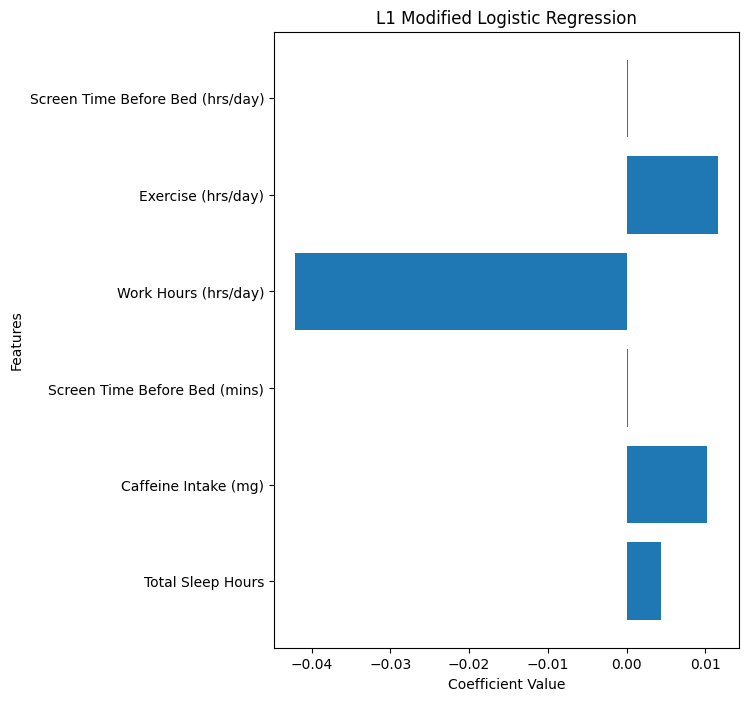

In [152]:
plt.figure(figsize=(6, 8))
plt.barh(X.columns, new_lr_l1.coef_[0])
plt.xlabel("Coefficient Value")
plt.ylabel("Features")
plt.title("L1 Modified Logistic Regression")
plt.show()

# 6) L2 (Ridge) ratio modification for Logistic Regression

In [153]:
new_lr_l2 = LogisticRegression(penalty='elasticnet', solver='saga', l1_ratio=0, C=100, max_iter=10000)
new_lr_l2.fit(X_train, y_train)

LogisticRegression(C=100, l1_ratio=0, max_iter=10000, penalty='elasticnet',
                   solver='saga')

In [154]:
print("Training acc: %f"%accuracy_score(y_train, new_lr_l2.predict(X_train)))
print("Testing acc:  %f"%accuracy_score(y_test, new_lr_l2.predict(X_test)))

Training acc: 0.602750
Testing acc:  0.580000


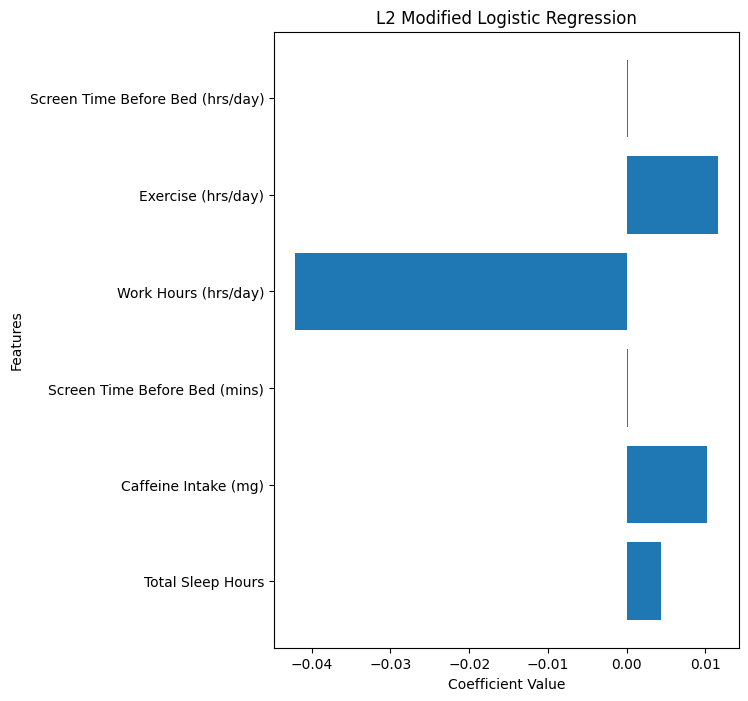

In [155]:
plt.figure(figsize=(6, 8))
plt.barh(X.columns, new_lr_l2.coef_[0])
plt.xlabel("Coefficient Value")
plt.ylabel("Features")
plt.title("L2 Modified Logistic Regression")
plt.show()

# 7) Conclusion

In [156]:
# For L1 (Ridge) Accuracy
print('L1 (Lasso) Accuracy')
print("Training acc: %f"%accuracy_score(y_train, new_lr_l1.predict(X_train)))
print("Testing acc:  %f"%accuracy_score(y_test, new_lr_l1.predict(X_test)))
print('')

# For L2 (Ridge) Accuracy
print('L2 (Ridge) Accuracy')
print("Training acc: %f"%accuracy_score(y_train, new_lr_l2.predict(X_train)))
print("Testing acc:  %f"%accuracy_score(y_test, new_lr_l2.predict(X_test)))

L1 (Lasso) Accuracy
Training acc: 0.602750
Testing acc:  0.580000

L2 (Ridge) Accuracy
Training acc: 0.602750
Testing acc:  0.580000


In [157]:
# classification
print('L1 (Lasso) Classification Report')
print(classification_report(y_test, new_lr_l1.predict(X_test)))
print('')
print('L2 (Ridge) Classification Report')
print(classification_report(y_test, new_lr_l2.predict(X_test)))

L1 (Lasso) Classification Report
              precision    recall  f1-score   support

           0       0.58      1.00      0.73       580
           1       0.00      0.00      0.00       420

    accuracy                           0.58      1000
   macro avg       0.29      0.50      0.37      1000
weighted avg       0.34      0.58      0.43      1000


L2 (Ridge) Classification Report
              precision    recall  f1-score   support

           0       0.58      1.00      0.73       580
           1       0.00      0.00      0.00       420

    accuracy                           0.58      1000
   macro avg       0.29      0.50      0.37      1000
weighted avg       0.34      0.58      0.43      1000



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

In [158]:
# The features selected for this analysis are not meaningful enough to predict the sleep quality of individuals.